# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.096478e+01     7.107177e+00
 * time: 0.0028929710388183594
     1     2.911189e+01     4.457058e+00
 * time: 0.013131856918334961
     2     1.999474e+01     4.296691e+00
 * time: 0.02544999122619629
     3     1.439593e+01     3.286183e+00
 * time: 0.03767895698547363
     4     1.314285e+01     3.894581e+00
 * time: 0.04753684997558594
     5     1.111807e+01     1.657348e+00
 * time: 0.059703826904296875
     6     1.015523e+01     1.853442e+00
 * time: 0.06947588920593262
     7     9.436563e+00     1.483306e+00
 * time: 0.07933402061462402
     8     9.029324e+00     7.992824e-01
 * time: 0.08914494514465332
     9     8.820193e+00     6.521239e-01
 * time: 0.0989530086517334
    10     8.643805e+00     7.454003e-01
 * time: 0.10914397239685059
    11     8.482871e+00     5.667308e-01
 * time: 0.1194770336151123
    12     8.329161e+00     5.567542e-01
 * time: 0.12996888160705566
    13     8.266697e+00     7.743239e-01
 * tim

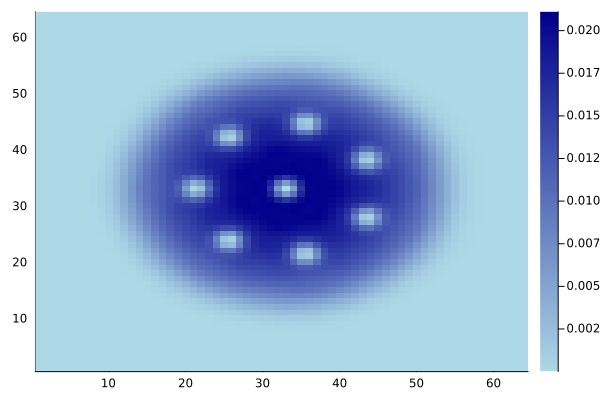

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)